## `Name: Mohamed Mosa Abo El-Ftoh`


---



## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

In [ ]:
!pip install pyspark

In [ ]:
import matplotlib.pyplot as plt


### Create a spark session and import the required libraries

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as fn
spark = SparkSession.builder.getOrCreate()

### Create a data schema programatically

In [ ]:
sample_data = spark.read.csv('healthcare-dataset-stroke-data.csv', header = True, inferSchema=True,  samplingRatio=0.00001)

mySchema = sample_data.schema
mySchema

StructType([StructField('id', StringType(), True), StructField('gender', StringType(), True), StructField('age', StringType(), True), StructField('hypertension', StringType(), True), StructField('heart_disease', StringType(), True), StructField('ever_married', StringType(), True), StructField('work_type', StringType(), True), StructField('Residence_type', StringType(), True), StructField('avg_glucose_level', StringType(), True), StructField('bmi', StringType(), True), StructField('smoking_status', StringType(), True), StructField('stroke', StringType(), True)])

In [ ]:
mySchema = StructType([StructField('id', IntegerType(), True), StructField('gender', StringType(), True), 
                       StructField('age', DoubleType(), True), StructField('hypertension', IntegerType(), True), 
                       StructField('heart_disease', IntegerType(), True), StructField('ever_married', StringType(), True), 
                       StructField('work_type', StringType(), True), StructField('Residence_type', StringType(), True), 
                       StructField('avg_glucose_level', DoubleType(), True), StructField('bmi', DoubleType(), True), 
                       StructField('smoking_status', StringType(), True), StructField('stroke', IntegerType(), True)])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [ ]:
df = spark.read.csv('healthcare-dataset-stroke-data.csv', header = True, schema=mySchema)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [ ]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [ ]:
df.show(10, truncate=False)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|id   |gender|age |hypertension|heart_disease|ever_married|work_type    |Residence_type|avg_glucose_level|bmi |smoking_status |stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|9046 |Male  |67.0|0           |1            |Yes         |Private      |Urban         |228.69           |36.6|formerly smoked|1     |
|51676|Female|61.0|0           |0            |Yes         |Self-employed|Rural         |202.21           |null|never smoked   |1     |
|31112|Male  |80.0|0           |1            |Yes         |Private      |Rural         |105.92           |32.5|never smoked   |1     |
|60182|Female|49.0|0           |0            |Yes         |Private      |Urban         |171.23           |34.4|smokes         |1     |
|1665 |Female|79.0|1           |0            |Yes      

In [ ]:
df.select([fn.count(fn.when(fn.isnan(c) | fn.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [ ]:
target_label = df.select('stroke').toPandas()
target_label

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
hight = target_label.value_counts()
values = [0,1]

In [ ]:
values

[0, 1]

<BarContainer object of 2 artists>

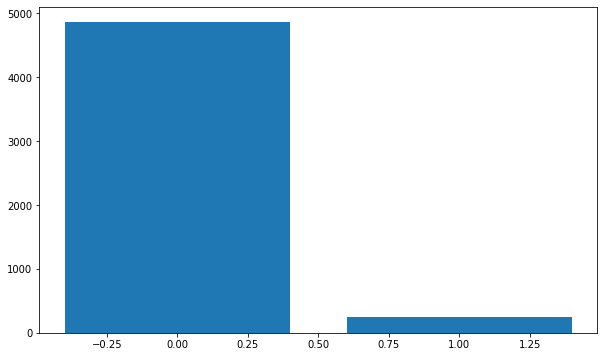

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(values, hight)

<AxesSubplot:xlabel='stroke', ylabel='count'>

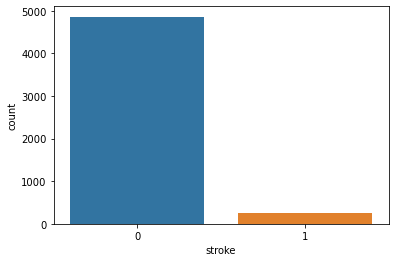

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [ ]:
df.select('age').summary().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    25%|              25.0|
|    50%|              45.0|
|    75%|              61.0|
|    max|              82.0|
+-------+------------------+



+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [ ]:
df.filter(fn.col('age') > 2).select('age').summary().show()

+-------+-----------------+
|summary|              age|
+-------+-----------------+
|  count|             4935|
|   mean|44.70982776089159|
| stddev|21.56859737335159|
|    min|              3.0|
|    25%|             27.0|
|    50%|             46.0|
|    75%|             61.0|
|    max|             82.0|
+-------+-----------------+



In [ ]:
df_new_ages = df.filter(fn.col('age') > 2)

### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [ ]:
df.select(['gender', 'smoking_status']).show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [ ]:
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [ ]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [ ]:
def changeGander(x):
    if x == 'Female':
        return 0
    elif x == 'Other':
        return 0
    elif x == 'Male':
        return 1

In [ ]:
changeGanderUDF = fn.udf(changeGander,IntegerType())

In [ ]:
df_new_gender = df_new_ages.withColumn('gender', changeGanderUDF(fn.col('gender')))
df_new_gender.show(5)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|     0|79.0|           1|            0|         

In [ ]:
df.select('smoking_status').where('smoking_status == "never smoked"').show(5)

+--------------+
|smoking_status|
+--------------+
|  never smoked|
|  never smoked|
|  never smoked|
|  never smoked|
|  never smoked|
+--------------+
only showing top 5 rows



In [ ]:
def changeSmokingStatus(x):
    if x == 'smokes':
        return 1.0
    elif x == 'Unknown':
        return 0.5
    elif x == 'never smoked':
        return 0.0
    elif x == 'formerly smoked':
        return 0.75
changeSmokingStatusUDF = fn.udf(changeSmokingStatus,DoubleType())

In [ ]:
df_new_smoking = df_new_gender.withColumn('smoking_status', changeSmokingStatusUDF(fn.col('smoking_status')))
df_new_smoking.show(5)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Sel

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [ ]:
df_new_smoking.select(['gender', 'smoking_status']).show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [ ]:
df_new_smoking.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [ ]:
df_new_smoking.select([fn.count(fn.when(fn.isnan(c) | fn.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|195|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [ ]:
df_not_null = df_new_smoking.na.drop()

In [ ]:
df_not_null.select([fn.count(fn.when(fn.isnan(c) | fn.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [ ]:
trainDF, testDF = df_not_null.randomSplit([0.8, 0.2], seed=42)

In [ ]:
trainDF.write.parquet('trainDF.parquet')

In [ ]:
testDF.write.parquet('testDF.parquet')

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [ ]:
trainDF = spark.read.parquet('trainDF.parquet')
testDF = spark.read.parquet('testDF.parquet')


In [ ]:
trainDF.show(5)
testDF.show(5)

+---+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
| id|gender| age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+---+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
| 77|     0|13.0|           0|            0|          No| children|         Rural|            85.81|18.6|           0.5|     0|
| 84|     1|55.0|           0|            0|         Yes|  Private|         Urban|            89.17|31.5|           0.0|     0|
| 99|     0|31.0|           0|            0|          No|  Private|         Urban|           108.89|52.3|           0.5|     0|
|129|     0|24.0|           0|            0|          No|  Private|         Urban|            97.55|26.2|           0.0|     0|
|156|     0|33.0|           0|            0|         Yes|  Private|         Rural|            86.97|42.2

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

In [ ]:
types_of_cols = trainDF.dtypes
cat_cols = [f for (f,d) in types_of_cols if d == 'string']
index_cols = [f +'_Index'  for f in cat_cols]
ohe_output_cols = [f +'_OHE'  for f in cat_cols]
num_cols = [f for (f,d) in types_of_cols if ((d != 'string') & (f != 'stroke'))]
assembler_input = ohe_output_cols + num_cols 

In [ ]:
assembler_input

['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [ ]:

string_indexer = StringIndexer(inputCols=cat_cols, outputCols=index_cols, handleInvalid='skip')
ohe_encoder = OneHotEncoder(inputCols=index_cols, outputCols=ohe_output_cols)
vecAssembler = VectorAssembler(inputCols=assembler_input, outputCol='features')

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol='features',
                        labelCol='stroke',
                        )

In [ ]:
myStages = [string_indexer, ohe_encoder, vecAssembler, lr]

In [ ]:
from pyspark.ml import Pipeline
pl = Pipeline(stages = myStages)
pipeline_model = pl.fit(trainDF)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [ ]:
pred_DF = pipeline_model.transform(testDF) 

In [ ]:
pred_DF.select('features').show(truncate=False)

+--------------------------------------------------------------------+
|features                                                            |
+--------------------------------------------------------------------+
|(14,[1,5,6,8,11,12],[1.0,1.0,91.0,42.0,98.53,18.5])                 |
|(14,[1,6,8,11,12,13],[1.0,163.0,20.0,94.67,28.8,0.5])               |
|(14,[0,1,6,8,11,12,13],[1.0,1.0,205.0,43.0,88.23,37.6,0.5])         |
|(14,[0,1,5,6,7,8,11,12],[1.0,1.0,1.0,259.0,1.0,79.0,198.79,24.9])   |
|(14,[0,1,5,6,8,11,12,13],[1.0,1.0,1.0,364.0,58.0,105.74,26.8,0.75]) |
|(14,[0,3,5,6,8,11,12,13],[1.0,1.0,1.0,458.0,37.0,72.09,24.1,1.0])   |
|(14,[4,6,8,11,12,13],[1.0,533.0,3.0,94.12,21.4,0.5])                |
|(14,[4,6,8,11,12,13],[1.0,587.0,14.0,92.22,22.8,0.5])               |
|(14,[3,6,8,11,12],[1.0,742.0,39.0,87.33,34.3])                      |
|(14,[4,6,8,11,12,13],[1.0,751.0,5.0,75.1,20.7,0.5])                 |
|(14,[0,2,5,6,8,11,12,13],[1.0,1.0,1.0,768.0,74.0,68.18,27.3,0.75])  |
|(14,[

In [ ]:
pred_DF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
pred_DF.select(['stroke', 'prediction']).show(5,truncate=False)

+------+----------+
|stroke|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
+------+----------+
only showing top 5 rows



In [ ]:
pred_DF.select(['stroke', 'prediction']).where('stroke == 1').show(5,truncate=False)


+------+----------+
|stroke|prediction|
+------+----------+
|1     |0.0       |
|1     |0.0       |
|1     |0.0       |
|1     |0.0       |
|1     |0.0       |
+------+----------+
only showing top 5 rows



all values are zero whatch is the model has low accursy 

In [ ]:
pred_DF.select(['stroke', 'prediction']).count()

906

### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [ ]:
evaluatorROC.evaluate(pred_DF)

0.4994246260069045

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.



In [ ]:
906/5110

0.17729941291585127

In [ ]:
def weight_col(x):
    if x == 1:
        return 0.95
    elif x == 0:
        return 0.05
weight_colUDF = fn.udf(weight_col,DoubleType())

In [ ]:
trainDFWeighted = trainDF.withColumn('weight', weight_colUDF(fn.col('stroke')))

In [ ]:
testDFWeighted = testDF.withColumn('weight', weight_colUDF(fn.col('stroke')))

In [ ]:
trainDFWeighted.show(5)

+---+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+------+
| id|gender| age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|weight|
+---+------+----+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+------+
| 77|     0|13.0|           0|            0|          No| children|         Rural|            85.81|18.6|           0.5|     0|  0.05|
| 84|     1|55.0|           0|            0|         Yes|  Private|         Urban|            89.17|31.5|           0.0|     0|  0.05|
| 99|     0|31.0|           0|            0|          No|  Private|         Urban|           108.89|52.3|           0.5|     0|  0.05|
|129|     0|24.0|           0|            0|          No|  Private|         Urban|            97.55|26.2|           0.0|     0|  0.05|
|156|     0|33.0|           0|            0|         Ye

In [ ]:
types_of_cols = trainDFWeighted.dtypes
cat_cols = [f for (f,d) in types_of_cols if d == 'string']
index_cols = [f +'_Index'  for f in cat_cols]
ohe_output_cols = [f +'_OHE'  for f in cat_cols]
num_cols = [f for (f,d) in types_of_cols if ((d != 'string') & (f != 'stroke'))]
assembler_input = ohe_output_cols + num_cols 

In [ ]:
assembler_input

['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'weight']

In [ ]:

string_indexer = StringIndexer(inputCols=cat_cols, outputCols=index_cols, handleInvalid='skip')
ohe_encoder = OneHotEncoder(inputCols=index_cols, outputCols=ohe_output_cols)
vecAssembler = VectorAssembler(inputCols=assembler_input, outputCol='features')

In [ ]:
lr = LogisticRegression(featuresCol='features',
                        labelCol='stroke',
                        weightCol='weight'
                        )

In [ ]:
myStages = [string_indexer, ohe_encoder, vecAssembler, lr]

In [ ]:
from pyspark.ml import Pipeline
pl = Pipeline(stages = myStages)
pipeline_model = pl.fit(trainDFWeighted)

In [ ]:
pred_DF_2 = pipeline_model.transform(testDFWeighted) 

In [ ]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')
evaluatorROC.evaluate(pred_DF_2)

1.0

In [ ]:
evaluatorROC.evaluate(pred_W)

0.6980219575156283